In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm


In [144]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def loss(x):
    return himmelblau(x[0], x[1])

In [145]:
# hyperparameters
episodes = 20
gens = 20

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
for e in range(episodes-1):
    n = np.random.normal(scale=0.5, size=(gens, 2))
    for i in range(gens-1):
        x = x_p + n[i, :]
        x_loss = loss(x)
        if x_loss < best_loss:
            best_loss = x_loss
            curr_best_x = x

    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))

    x_p = curr_best_x

print(plot_xs)

[[ 0.23047344 -0.9322272 ]
 [ 0.23047344 -0.9322272 ]
 [ 0.85429828 -0.32682354]
 [ 1.75868422  0.01550519]
 [ 2.32245064  0.81117676]
 [ 3.48417685  1.72558815]
 [ 3.08876135  1.86900341]
 [ 2.93405468  1.97422672]
 [ 2.93405468  1.97422672]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]
 [ 2.97462058  1.99455336]]


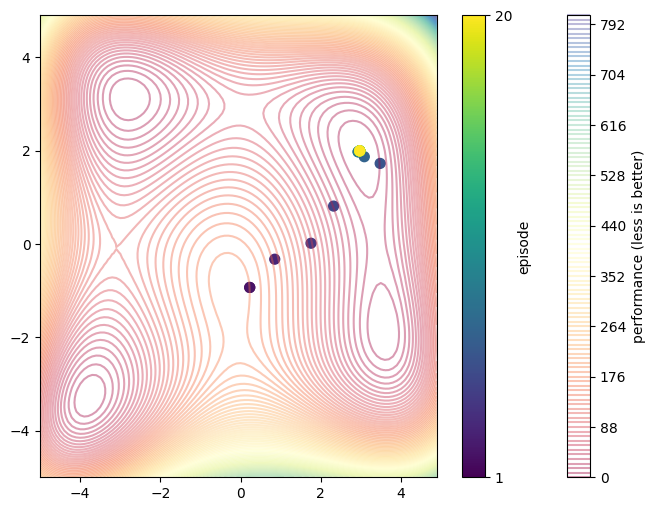

In [146]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('episode')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([1, len(plot_xs)])
plt.show()